# <p style="text-align: center;"> <b> Asking some meaningful questions about the data </b></p>
---

## Table of Contents


---

# 1. Introduction <a class="anchor" id="introduction"></a>

## 1.1 Requirements <a class="anchor" id="requirements"></a>

# 2. Implementation <a class="anchor" id="implementation"></a>

## Import libraries <a class="anchor" id="import_libraries"></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import re
from datetime import datetime
import datetime as dt

In [4]:
# pd.set_option('display.max_columns', None)
manga_df = pd.read_csv('../data/processed_comic.csv')
manga_df.head()

,Title,Score,Vote,Ranked,Popularity,Members,Favorite,Volumes,Chapters,Status,Genres,Author,Recommended,Mixed Feelings,Not Recommended,Release date,Time from release
0,Berserk,9.47,331116,1,1,664993,122789,4.0,23.0,Publishing,"['Action', 'Adventure', 'Award Winning', 'Dram...","Miura, Kentarou (Story & Art), Studio Gaga (Art)",233,15,10,1989-08-25,12518 days 21:22:56.009194
1,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,9.30,156294,2,26,256032,42857,24.0,96.0,Finished,"['Action', 'Adventure', 'Mystery', 'Supernatur...","Araki, Hirohiko (Story & Art)",120,7,1,2004-01-19,7258 days 21:22:56.009194
2,Vagabond,9.24,136323,3,15,364687,40135,37.0,327.0,On Hiatus,"['Action', 'Adventure', 'Award Winning']","Inoue, Takehiko (Story & Art), Yoshikawa, Eiji...",88,8,1,1998-09-03,9222 days 21:22:56.009194
3,One Piece,9.22,366535,4,3,599059,114472,4.0,23.0,Publishing,"['Action', 'Adventure', 'Fantasy']","Oda, Eiichiro (Story & Art)",173,17,16,1997-07-22,9630 days 21:22:56.009194
4,Monster,9.15,93906,5,29,236238,20495,18.0,162.0,Finished,"['Award Winning', 'Drama', 'Mystery']","Urasawa, Naoki (Story & Art)",64,7,5,1994-12-05,10590 days 21:22:56.009194


In [5]:
manga_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7276 entries, 0 to 7275
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              7276 non-null   object 
 1   Score              7276 non-null   float64
 2   Vote               7276 non-null   int64  
 3   Ranked             7276 non-null   int64  
 4   Popularity         7276 non-null   int64  
 5   Members            7276 non-null   int64  
 6   Favorite           7276 non-null   int64  
 7   Volumes            7276 non-null   float64
 8   Chapters           7276 non-null   float64
 9   Status             7276 non-null   object 
 10  Genres             7276 non-null   object 
 11  Author             7276 non-null   object 
 12  Recommended        7276 non-null   int64  
 13  Mixed Feelings     7276 non-null   int64  
 14  Not Recommended    7276 non-null   int64  
 15  Release date       5531 non-null   object 
 16  Time from release  7276 

## Question 01 <a class="anchor" id="Question 01"></a>

+ Question 01: How does the number of chapters and volumes relate to the number of readers (`members`) and their engagement (`favorites`)?
+ Purpose: Understand the correlation between manga length and reader engagement.
+ Analysis: 
    + Calculate correlation coefficients between pairs (Chapters-Members, Volumes-Members, Chapters-Favorites, Volumes-Favorites)
    + Add trendlines to identify any patterns or correlations.

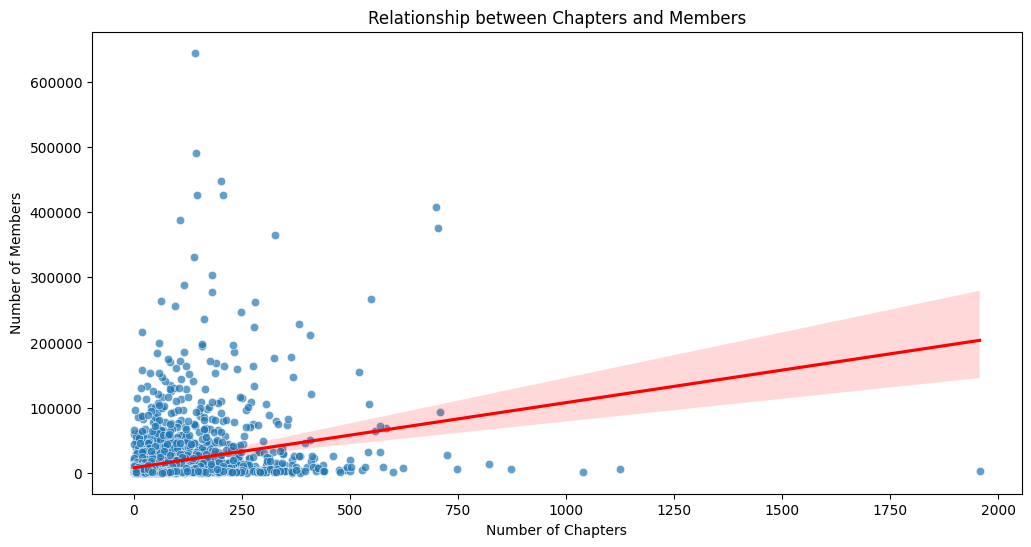

In [23]:
# Convert 'Volumes' and 'Chapters' columns to numeric (removing 'Unknown' values)
manga_df['Volumes'] = pd.to_numeric(manga_df['Volumes'], errors='coerce')
manga_df['Chapters'] = pd.to_numeric(manga_df['Chapters'], errors='coerce')
manga_df['Members'] = pd.to_numeric(manga_df['Members'].str.replace(',', ''), errors='coerce')  # Remove commas and convert to numeric
manga_df['Favorite'] = pd.to_numeric(manga_df['Favorite'].str.replace(',', ''), errors='coerce')  # Remove commas and convert to numeric

# Scatter plot for Chapters vs Members
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Chapters', y='Members', data=manga_df, alpha=0.7)
sns.regplot(x='Chapters', y='Members', data=manga_df, scatter=False, color='red')  # Add trendline
plt.title('Relationship between Chapters and Members')
plt.xlabel('Number of Chapters')
plt.ylabel('Number of Members')
plt.show()

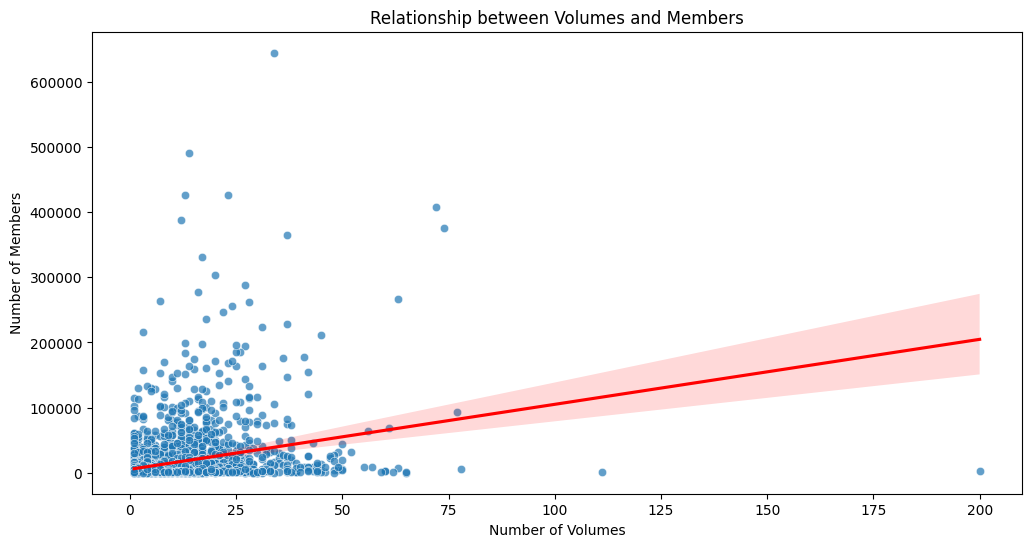

In [24]:
# Scatter plot for Volumes vs Members
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Volumes', y='Members', data=manga_df, alpha=0.7)
sns.regplot(x='Volumes', y='Members', data=manga_df, scatter=False, color='red')  # Add trendline
plt.title('Relationship between Volumes and Members')
plt.xlabel('Number of Volumes')
plt.ylabel('Number of Members')
plt.show()

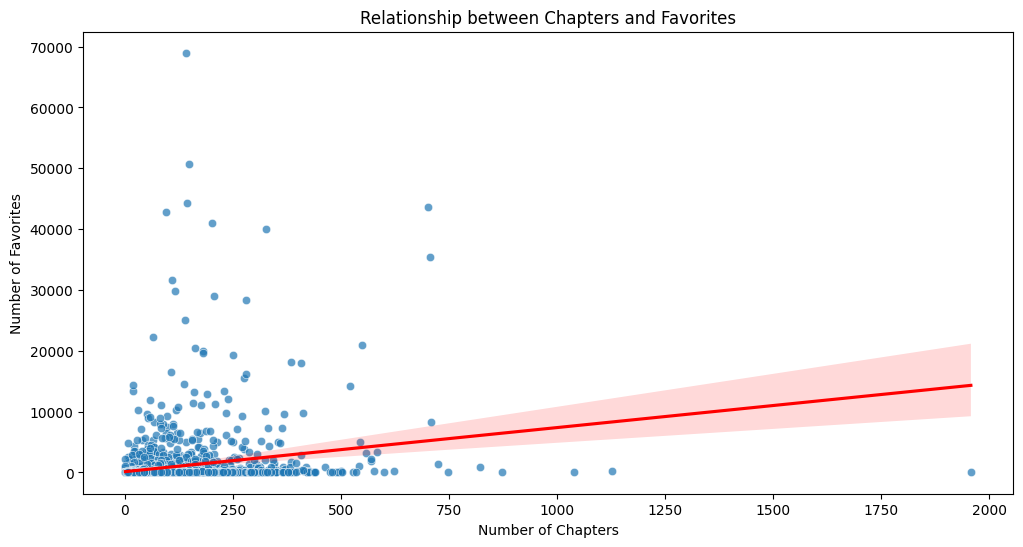

In [25]:
# Scatter plot for Chapters vs Favorites
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Chapters', y='Favorite', data=manga_df, alpha=0.7)
sns.regplot(x='Chapters', y='Favorite', data=manga_df, scatter=False, color='red')  # Add trendline
plt.title('Relationship between Chapters and Favorites')
plt.xlabel('Number of Chapters')
plt.ylabel('Number of Favorites')
plt.show()

## Question 02 <a class="anchor" id="Question 02"></a>

**Question 02:** Which authors have the highest average scores for their manga on MyAnimeList?
+ Purpose: Identify influential authors based on reader ratings.
+ Analysis:

Group the data by the "Author" column.
Calculate the average score for each author.
Visualize the top authors and their average scores using a bar chart.

## Question 03 <a class="anchor" id="Question 03"></a>

## Question 04 <a class="anchor" id="Question 04"></a>

## Question 05 <a class="anchor" id="Question 05"></a>

## Question 06 <a class="anchor" id="Question 06"></a>

## Question 07 <a class="anchor" id="Question 07"></a>

## Question 08 <a class="anchor" id="Question 08"></a>

## Question 09 <a class="anchor" id="Question 09"></a>

## Question 10 <a class="anchor" id="Question 10"></a>